# Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

In [49]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib import pyplot as plt

Creating custom dataset

In [50]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [51]:
X.shape, y.shape

((50000, 15), (50000,))

In [52]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

## SGD classifier

In [54]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [55]:
# fit the model
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [56]:
clf.coef_, clf.coef_.shape, clf.intercept_
# clf.coef_ will return the weights
# clf.coef_.shape will return the shape of weights
# clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistic Regression with L2 regularization Using SGD: without using sklearn




<br>

* 1. Initialize the weight_vector and intercept term to zeros 

* 2. Create a loss function

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:
    - for each batch of data points in train:
        - calculate the gradient of loss function w.r.t each weight in weight vector
        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>
        - Calculate the gradient of the intercept
           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$
        - Update weights and intercept
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>
        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights
    - append this loss in the list


In [57]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    # initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    # use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    # initialize bias to zero
    w = np.zeros_like(row_vector)
    b = 0
    return w,b

In [58]:
# initialize the weights
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='cyan'>Grader function - 1 </font>

In [59]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

Compute sigmoid

$sigmoid(z)= 1/(1+exp(-z))$

In [60]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    res = 1/(1+np.exp(-z))
    return res

<font color='cyan'>Grader function - 2</font>

In [61]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

Compute loss

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [62]:
def logloss(y_true,y_pred):
    # while dealing with numpy arrays we can use vectorized operations for quicker calculations as compared to using loops
    # https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    # https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    loss = -1*np.sum(np.mean(y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)))

    return loss

<font color='cyan'>Grader function - 3 </font>

In [63]:
# round off the value to 8 values
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(np.round(loss,6)==0.076449)
  return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)

True

Compute gradient w.r.to  'w' 

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [64]:
# make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(np.dot(w.T, x) + b)) - (alpha/N)*w
    return dw

In [65]:
def sigmoid(z):
  # compute sigmoid(z) and return result
  res = 1/(1+np.exp(-z))
  return res

In [66]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(np.dot(w.T, x) + b)) - (alpha/N) * w
    return dw

<font color='cyan'>Grader function - 4 </font>

In [67]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.round(np.sum(grad_dw),5)==4.75684)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

Compute gradient w.r.to 'b' 

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [68]:
# db should be a scalar value
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y - sigmoid(np.dot(w.T, x) + b)

    return db

<font color='cyan'>Grader function - 5 </font>

In [69]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(np.round(grad_db,4)==-0.3714)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0.5
grad_b=0.1
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

In [70]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for p in range(N):
        z=np.dot(w,X[p])+b
        predict.append(sigmoid(z))
    return np.array(predict)

Implementing logistic regression

In [71]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    # Here eta0 is learning rate
        
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights

    # for every epoch
    for epoch in range(epochs):
      # for every data point(X_train,y_train)
      for i, j in zip(X_train, y_train):
        # computing gradients w.r.t w and b
        dw = gradient_dw(i,j,w,b,alpha,N) 
        db = gradient_db(i,j,w,b)
        # updating w and b
        w = w + (eta0 * dw) 
        b = b + (eta0 * db) 

      # predicting based on X_train data
      train_pred = pred(w, b, X_train)
      # computing log loss
      loss_x = logloss(y_train, train_pred)
      train_loss.append(loss_x)

      # predicting based on X_test data
      test_pred = pred(w, b, X_test)
      # computing log loss
      loss_y = logloss(y_test, test_pred)
      test_loss.append(loss_y)

    return w, b, train_loss, test_loss

In [72]:
# training the model
alpha=0.001
eta0=0.0001
N=len(X_train)
epochs=10
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [73]:
# print thr value of weights w and bias b
print(w)
print(b)

[-0.42320231  0.19097502 -0.14588899  0.33813457 -0.21204102  0.56528013
 -0.44537754 -0.09169275  0.21798652  0.16980144  0.19524866  0.00226123
 -0.07784739  0.33881853  0.02215503]
-0.8505912574144183


In [74]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept

w-clf.coef_, b-clf.intercept_

(array([[ 0.00016461,  0.00549937,  0.00270137, -0.0033095 , -0.00385432,
          0.00511434,  0.00704729,  0.00239538,  0.00871332, -0.01103982,
         -0.00180325, -0.00195793,  0.00175631,  0.00029051, -0.00051218]]),
 array([0.00254704]))

<font color='cyan'>Grader function - 6 </font>

In [75]:
# this grader function should return True
# the difference between custom weights and clf.coef_ should be less than or equal to 0.05
def difference_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True
difference_check_grader(w,b,clf.coef_,clf.intercept_)   

The custom weights are correct


True

Plotting train and test loss vs epochs to see that the curve is converging

In [76]:
epoch_list = [i for i in range(0, epochs)]

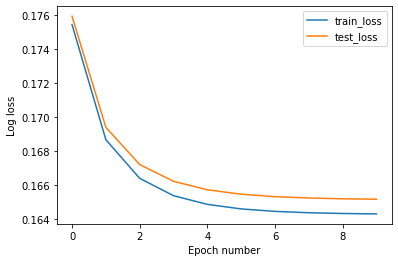

In [77]:
plt.plot(epoch_list, train_loss, label = "train_loss")
plt.plot(epoch_list, test_loss, label = "test_loss")
plt.xlabel("Epoch number")
plt.ylabel("Log loss")
plt.legend()
plt.show()